In [84]:
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import random as rd
import statistics as st

In [85]:
dataset = 'data2.txt'

In [86]:
# def get_edge_list(file_name):
#     with open(file_name) as ifs:
#         lines = ifs.readlines()
#         edge_list = map(lambda line: map(int, line.strip().split()), filter(lambda ele: '#' not in ele, lines))
#     return edge_list

def get_edge_list(file_name):
    # Open the file and read its contents
    with open(file_name) as file:
        lines = file.readlines()

    # Remove lines that are comments (start with "#")
    lines = [line for line in lines if '#' not in line]

    # Convert each line to a pair of integers
    edge_list = []
    for line in lines:
        edge = tuple(map(int, line.strip().split()))
        edge_list.append(edge)
    
    return edge_list

def get_undirected_graph_info(file_name):
    my_edge_list = get_edge_list(file_name)
    undirected_graph = nx.Graph()
    undirected_graph.add_edges_from(my_edge_list)
    file_info = file_name.split(os.sep)[-1].split('_')[0]
    str_list = [file_info, 'nodes num:' + str(undirected_graph.number_of_nodes()), 'edges num:'
                + str(undirected_graph.number_of_edges())]
    print (' | '.join(str_list))


def get_dir_info(dir_name):
    my_walk = os.walk(dir_name)
    my_root, sub_root_list, file_list = list(my_walk)[0]
    path_list = map(lambda ele: my_root + os.sep + ele, file_list)
    for my_path in path_list:
        get_undirected_graph_info(my_path)


In [87]:
get_undirected_graph_info(dataset)

karate.txt | nodes num:34 | edges num:78


In [88]:
edgeList = get_edge_list(dataset)

In [89]:
# print(edgeList)

In [90]:
undirected_graph = nx.Graph()
undirected_graph.add_edges_from(edgeList)

In [91]:

# nx.draw_networkx(undirected_graph,pos=nx.random_layout(undirected_graph))

In [92]:
# rd.choice (list(undirected_graph.edges(1)))
# undirected_graph.edges((1,2))


In [93]:
graphEdge = undirected_graph.edges()
graphNode = undirected_graph.nodes()


In [94]:
number_of_edges = len(graphEdge)
number_of_nodes = len(graphNode)
print(number_of_nodes, number_of_edges)

34 78


In [95]:
initialGene= np.full(number_of_edges, -1)

In [96]:
locus = [i for i in range(1,number_of_edges+1)]

In [97]:
len(initialGene)

78

In [98]:
labledEdge = {t: i+1 for i, t in enumerate(graphEdge)}
# labledEdge

In [99]:
def getEdgeLabel(labledEdge,edge):
    try:
      return labledEdge[edge]
    except:
      try:
        return labledEdge[(edge[1],edge[0])]
      except:
        print('NO KEY FOUND')
    

In [100]:
def getEdgeValue(labledEdge,value):
   return next((k for k, v in labledEdge.items() if v == value), None)

getEdgeValue(labledEdge,5)

(2, 14)

In [101]:
#make initial communities

gene = []
for  edge,l in labledEdge.items():
    connectedEdges = list(undirected_graph.edges(edge))
    geneValue = getEdgeLabel(labledEdge,rd.choice(connectedEdges))


    if(geneValue != None):
        gene.append(geneValue)

# print(locus)
# print(gene)


In [102]:
def drawLayout(labledEdge):
    # layout = nx.random_layout(undirected_graph)
    layout = nx.circular_layout(undirected_graph)
    plt.figure(3,figsize=(12,12)) 
    nx.draw_networkx(undirected_graph,pos=layout,node_size=500)
    nx.draw_networkx_edge_labels(undirected_graph,pos=layout,edge_labels=labledEdge)
# drawLayout(labledEdge)

In [103]:
# nx.draw_networkx_edge_labels(undirected_graph,pos=nx.random_layout(undirected_graph),edge_labels=labledEdge)

In [104]:
#finished but not tested with real gene
def calculateFitness(communities: list,undirected_graph):
    D = 0
    E = undirected_graph.number_of_edges()
    for i in communities:
        community = undirected_graph.subgraph(i)
        mc = community.number_of_edges()
        nc = community.number_of_nodes()
        if nc>=3:
            D += mc * ((mc - (nc-1)) / (((nc-2)*(nc-1))))
            # print(D)

    return 2*D/E

# calculateFitness([[1, 5], [2, 3, 4], [6, 8, 9], [7]],undirected_graph)

0.038461538461538464

In [105]:
import random
from collections import Counter

def most_frequent(lst):
    # Count the number of occurrences of each element in the list
    count = Counter(lst)

    # Get a list of tuples with the elements and their frequencies, sorted by frequency in descending order
    most_common = count.most_common()

    # Select the most frequent item and, if there are multiple items with the same frequency, choose one at random
    selected = None
    frequency = 0
    for element, freq in most_common:
        if freq > frequency:
            selected = random.sample([element], 1)[0]
            frequency = freq
        elif freq == frequency:
            selected = random.sample([selected, element], 1)[0]

    return selected

# Test the function
# print(most_frequent([1, 2, 3, 3, 3, 4, 4, 5, 5]))  # 3
# print(most_frequent([1, 2, 3, 3, 4, 4, 5, 5]))  # 3 or 5
# print(most_frequent([1, 2, 3, 4, 5]))  # 1 or 2 or 3 or 4 or 5

# def most_common(List):
#     return(st.mode(List))
   
# List = [2, 1, 2, 2, 1, 3]
# print(most_common(List))

3
5
5


In [106]:
def has_repetitions(lst):
    return len(set(lst)) < len(lst)

has_repetitions([1,1,2,2])



True

In [107]:
from collections import defaultdict



def createCommunities(x:dict):
    groups = defaultdict(list)

    # Group the keys based on the values
    for key, value in x.items():
        groups[value].append(key)

    # Get the list of lists with the keys
    y = list(groups.values())

    return y

x = {1: 2, 2: 2, 3: 2, 4: 8, 5: 1, 6: 8, 7: 8, 8: 8, 9: 8}
createCommunities(x)

[[1, 2, 3], [4, 6, 7, 8, 9], [5]]

In [108]:
#Label Propagation

def labelProp(undirected_graph):
    
    graphNode = undirected_graph.nodes()
    asList = sorted(list(graphNode))
    randomizedList = asList[:]
    rd.shuffle(randomizedList)
    # print(randomizedList)
    labledNodes = {i+1:t  for i, t in enumerate(asList)}
    prevLabledNodes = labledNodes
    # print(labledNodes)
    stop = False
    while not stop:
        for v in randomizedList:
            # v = rd.choice(asList)
            # v = 5
            neighbors = [i for i in nx.all_neighbors(undirected_graph,v)]
            labledNeighbors = [labledNodes[i] for i in nx.all_neighbors(undirected_graph,v)]
            # print(neighbors)
            # if(has_repetitions(labledNeighbors)):
            #     freq = most_frequent(labledNeighbors)
            #     labledNodes[v] = freq
            # else:
            #     freq = rd.choice(labledNeighbors)
            #     labledNodes[v] = freq
            # print(labledNodes)
            freq = most_frequent(labledNeighbors)
            labledNodes[v] = freq
            
            if(prevLabledNodes == labledNodes):
                stop = True
    return labledNodes

createCommunities(labelProp(undirected_graph))

[[1, 3, 4, 8, 9, 10, 12, 13, 14, 22, 29],
 [2, 18, 20],
 [5],
 [6, 7, 11, 17],
 [15, 19, 23, 24, 27, 30, 31, 33, 34],
 [16, 21],
 [25, 26, 28, 32]]

In [109]:
# Local Expansion

def localExpansion(undirected_graph):
    counter = 0
    communities = []
    graphNode = undirected_graph.nodes()
    asList = list(graphNode)
    V = len(asList)
    tempList = asList[:]
    while counter < V:
        community = []
        seed = rd.choice(tempList)
        community.append(seed)
        tempList.remove(seed)
        counter+=1
        naturalCommNodes = list(nx.all_neighbors(undirected_graph,seed))
        for i in naturalCommNodes:
            # naturalCommNodes.remove(seed)
            if i not in tempList:
                continue
            community.append(i)
            try:
                tempList.remove(i)
            except ValueError:
                print('E')
            counter+=1
        communities.append(community)
    return communities
        
# localExpansion(undirected_graph)

In [110]:
centrality = nx.eigenvector_centrality(undirected_graph)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
sorted_centrality[0:11]

[(34, 0.37337121301323495),
 (1, 0.3554834941851943),
 (3, 0.3171893899684447),
 (33, 0.30865104773369595),
 (2, 0.2659538704545024),
 (9, 0.22740509147166044),
 (14, 0.22646969838808145),
 (4, 0.21117407832057056),
 (32, 0.191036269797917),
 (31, 0.17476027834493085),
 (8, 0.17095511498035432)]

In [111]:
# Local Expansion

def localExpansionWithEigen(undirected_graph):
    counter = 0
    communities = []
    graphNode = undirected_graph.nodes()
    asList = list(graphNode)
    V = len(asList)
    tempList = asList[:]

    centrality = nx.eigenvector_centrality(undirected_graph)
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

    
    while counter < V :
        community = []
        seed = sorted_centrality[0][0]
        sorted_centrality.pop(0)
        if seed not in tempList:
            continue
        community.append(seed)
        tempList.remove(seed)
        counter+=1
        naturalCommNodes = list(nx.all_neighbors(undirected_graph,seed))
        for i in naturalCommNodes:
            # naturalCommNodes.remove(seed)
            if i not in tempList:
                continue
            community.append(i)
            tempList.remove(i)
            counter+=1
        communities.append(community)
    return communities
        
# localExpansionWithEigen(undirected_graph)

In [112]:
# Local Expansion

def localExpansionWdegree(undirected_graph):
    counter = 0
    communities = []
    graphNode = undirected_graph.nodes()
    asList = list(graphNode)
    V = len(asList)
    tempList = asList[:]
    while counter < V:
        community = []
        seed = rd.choice(tempList)
        # print(seed)
        community.append(seed)
        tempList.remove(seed)
        counter+=1
        naturalCommNodes = list(nx.all_neighbors(undirected_graph,seed))
        for i in naturalCommNodes:
            # naturalCommNodes.remove(seed)
            if i not in tempList:
                continue
            community.append(i)
            try:
                tempList.remove(i)
            except ValueError:
                # print('E')
            counter+=1
        communities.append(community)
    return communities
        
# localExpansionWdegree(undirected_graph)

In [113]:

for i in range(7):
    le = localExpansion(undirected_graph)
    fit = calculateFitness(le,undirected_graph)
    # print(f'fitness : {fit} | CommunityList : {le}')
    
    

In [114]:
for i in range(7):
    lp = labelProp(undirected_graph)
    cmnti = createCommunities(lp)
    # print(cmnti)
    fit = calculateFitness(cmnti,undirected_graph)
    # print(f'fitness : {fit} | CommunityList : {cmnti}')



In [115]:
# for i in range(7):
#     le = localExpansionWithEigen(undirected_graph)
#     fit = calculateFitness(le,undirected_graph)
#     print(f'fitness : {fit} | CommunityList : {le}')

In [116]:
# undirected_graph.edges([8,9])

In [117]:
g = [-1]*5

g[4] = 'a'
g

[-1, -1, -1, -1, 'a']

In [118]:
def has_common_element(list1, list2):
    for element in list1:
        if element in list2:
            return True
    return False

In [119]:
# # this takes a list of community and returns a list of locus and gene
# def communityToGene(communities:list,number_of_nodes:int,number_of_edges:int,labledEdge:dict):
#     locus = [i for i in range(1,number_of_edges+1)]
#     gene = [-1] * number_of_edges
#     # overlappingEdges = []
#     for community in communities:
#         edgesAsTuples = list(undirected_graph.edges(community))
#         edges=[getEdgeLabel(labledEdge,i) for i in edgesAsTuples]
#         # print(edgesAsTuples)
#         for n,i in enumerate(edgesAsTuples):
#             edgeLabel = getEdgeLabel(labledEdge,i)
#             ngEdges = list(undirected_graph.edges(i))
#             ngEdges.remove(i)
#             filtered_ngEdges = [t for t in ngEdges if t[0] in community and t[1] in community]
#             ngEdgesLabeled=[getEdgeLabel(labledEdge,t) for t in filtered_ngEdges]
#             # print(ngEdgesLabeled)
#             for element in ngEdgesLabeled:
#                 if element in edges:
#                     if(gene[edgeLabel-1]!=-1 or gene[element-1]== edgeLabel):
#                         continue
#                     gene[edgeLabel-1] = element
#                     edges.remove(element)
#                     break
#     # for n,i in enumerate(gene):
#     #     if i == -1:
#     #         l= locus[n]
#     #         edge = getEdgeValue(labledEdge,l)
#     #         for k in communities:
#     #             if edge[0] in k or edge[1] in k:
                    

            
        
#     return locus,gene


# # locus,gene = [],[]
# # locus,gene = communityToGene([[3, 1, 2, 4], [8, 6, 7, 9], [5]],number_of_nodes,number_of_edges,labledEdge)
# locus,gene = communityToGene([[1,2,3,4,5], [5,6,7,8,9]],number_of_nodes,number_of_edges,labledEdge)
# print((locus))
# print((gene))

# # locus,gene = communityToGene(localExpansionWithEigen(undirected_graph),number_of_nodes,number_of_edges,labledEdge)
# # print((gene)) 
# # decode_communities(locus,gene)



In [120]:
def removeEdge(adj_list,i):
    for edge in adj_list:
        try:
            adj_list[edge].remove(i)
        except:
            pass
    return adj_list


In [121]:

def communityToGene(communities:list,number_of_nodes:int,number_of_edges:int,labledEdge:dict):
    locus = [i for i in range(1,number_of_edges+1)]
    gene = [-1] * number_of_edges
    # overlappingEdges = []
    notVisited =set()
    for community in communities:
        subGraph = undirected_graph.subgraph(community)
        subGraphEdges = list(subGraph.edges())
        # print(subGraphEdges)
        adj_list = defaultdict(set)
        adL = defaultdict(set)
        for i in subGraphEdges:
            nbr = list(subGraph.edges(i))
            nbr.remove(i)
            for j in nbr:
                adj_list[getEdgeLabel(labledEdge,i)].add(getEdgeLabel(labledEdge,j))
                adL[getEdgeLabel(labledEdge,i)].add(getEdgeLabel(labledEdge,j))    
        old_i = -1

        for edge in adj_list:
            for i in adj_list[edge]:
                if old_i != edge and gene[edge-1] == -1:
                    # print(i)
                    adj_list = removeEdge(adj_list, i)
                    gene[edge-1] = i
                    old_i = i
                    break
                else:
                    notVisited.add(edge)
            else:
                pass
        # print(notVisited)
        # print(adL)
        while notVisited:
            value = notVisited.pop()
            try:
                for i,j in zip(adL[value],adj_list[value]):
                    # print(locus[gene.index(value)])
                    if j!=None and locus[gene.index(value)] != j:
                        gene[value-1]=j
                        break
                    elif locus[gene.index(value)] != i:
                        gene[value-1]=i
                        break
            except ValueError:
                print("Ignoring ValueError in communityToGene() for ",value)
        for i in range(len(gene)):
            if gene[i]==-1:
                gene[i]=locus[i]

    return locus,gene

# [[1, 2, 3, 4, 5], [4, 6, 7, 8, 9], [8, 9, 6]] [[4, 2, 3, 5, 6, 7], [8, 9], [1]]
# locus,gene = communityToGene([[1, 2, 3, 4, 5], [4, 6, 7, 8, 9], [8, 9, 6]],number_of_nodes,number_of_edges,labledEdge)
# # print((locus))
# # print((gene))





[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
[2, 25, 11, 4, 5, 6, 7, 8, 9, 1, 3, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]


In [122]:
def locusNgeneToTuples(locus:list,gene:list):
    pass

In [123]:
def crossOver(parent1:list, parent2:list, cp:float):
    offspring = [-1]*len(parent1) 
    for g in range(len(offspring)):
        if rd.uniform(0, 1) < cp:
            offspring[g] = parent1[g]
        else:
            offspring[g] = parent2[g]
    return offspring

# testParent1 = [2, 3, 1, 5, 6, 4, 8, 9, 7, 8, 10, 11, 9, 13]
# testParent2 = [5, 1, 1, 6, 2, 7, 4, 9, 10, 8, 12, 14, 11, 11]
# crossOver(testParent1,testParent2, 0.5)
    

In [124]:
# drawLayout(labledEdge)

In [125]:
def mutate(gene:list,mp:float,labledEdge:dict,undirected_graph)->list:
    individual = gene[:] 
    # print(individual)
    for g in range(len(individual)):
        if rd.uniform(0, 1) < mp:
            edge = getEdgeValue(labledEdge,g+1)
            # print(edge)
            neigEdges = list(undirected_graph.edges(edge))
            neigEdgesLabeled = [getEdgeLabel(labledEdge,i) for i in neigEdges]
            # oldGene = getEdgeValue( labledEdge ,individual[g])
            # print("In Mutate",individual[g])
            try:
                neigEdgesLabeled.remove(individual[g])
                neigEdgesLabeled.remove(g+1)
            except ValueError:
                print('Ignoring ValueError In mutate function for ',individual[g])
            if((neigEdgesLabeled)==0):
                continue
            mutatedEdge = rd.choice(neigEdgesLabeled)
            # print(randomEdge)
            # mutatedEdge = getEdgeLabel(labledEdge,randomEdge)
            individual[g]= mutatedEdge

    return individual


print("Before Mutation ⬇")
print([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
print([2, 3, 1, 4, 1, 4, 7, 8, 9, 11, 12, 11, 14, 11])
mutated = mutate([2, 3, 1, 4, 1, 4, 7, 8, 9, 11, 12, 11, 14, 11],0.5,labledEdge,undirected_graph)
print([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
print(mutated)
print("After Mutation ⬆")

Before Mutation ⬇
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[2, 3, 1, 4, 1, 4, 7, 8, 9, 11, 12, 11, 14, 11]
Ignoring ValueError In mutate function for  4
Ignoring ValueError In mutate function for  8
Ignoring ValueError In mutate function for  9
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[2, 7, 25, 1, 29, 4, 7, 4, 7, 30, 24, 20, 19, 16]
After Mutation ⬆


In [126]:
# def localSearch(individual:list,labledEdge:dict,undirected_graph)->list:
#     locus, individualEdges = communityToGene(individual)
#     for cluster in individual:
#         for node in cluster:
#             edge = getEdgeValue(labledEdge,g+1)
#             # print(edge)
#             neigEdges = list(undirected_graph.edges(edge))
#             neigEdgesLabeled = [getEdgeLabel(labledEdge,i) for i in neigEdges]
#             oldEdge = getEdgeValue( labledEdge ,individual[g])
#             # neigEdgesLabeled.remove(individual[g])
#             # neigEdgesLabeled.remove(g+1)
#             # if((neigEdgesLabeled)==0): continue    
#             # mutatedEdge = rd.choice(neigEdgesLabeled)
#             # # print(randomEdge)
#             # # mutatedEdge = getEdgeLabel(labledEdge,randomEdge)
#             # individual[g]= mutatedEdge
#             try:
#                 neigEdges.remove(oldEdge)
#             except KeyError:
#                 neigEdges.remove((oldEdge[1],oldEdge[0]))
#             for i in neigEdges:
#                 pass
                
                


In [127]:
# def decode_communities(locus, gene):
#     # Initialize an empty list to store the communities of locuss
#     communities = []
    
#     # Initialize a dictionary to store the mapping from locuss to their communities
#     locus_to_community = {}
#     loc = []
#     gen = []
#     s = -1
#     # Iterate through each locus and its corresponding gene value
#     for l,g  in zip(locus, gene):
#         if len(loc)==0:
#             loc.append(l)
#             gene.append(g)
#             continue

#         # If the locus is not already assigned to a community
#         if l not in gene:
#             # If the gene value for this locus is also not in the locus_to_community dictionary,
#             # this means we have found a new community of locuss
#             if g not in loc:
#                 # Create a new community and add the current locus to it
#                 new_community = [locus,community]
#                 locus_to_community[locus] = new_community
#                 communities.append(new_community)
#                 # print(locus_to_community)
#             # Otherwise, the gene value corresponds to another locus that is already in a community,
#             # so we add the current locus to that community
#             else:
#                 loc.append(l)
#                 gene.append(g)
#         # If the locus is already assigned to a community, we check if it is in the same community
#         # as the locus corresponding to its gene value. If it is not, we merge the two communities.
#         else:
#             # If the gene value corresponds to an locus that is not in the same community,
#             # we merge the two communities by adding the locuss in the community of the gene value
#             # to the community of the current locus
#             if (locus in locus_to_community) and (community in locus_to_community) and (locus_to_community[locus] != locus_to_community[community]):
#                 community_to_merge = locus_to_community[community]
#                 current_community = locus_to_community[locus]
#                 current_community.extend(community_to_merge)
#                 for locus_in_community in community_to_merge:
#                     locus_to_community[locus_in_community] = current_community
#                 # Remove the merged community from the list of communities
#                 communities.remove(community_to_merge)
    
#     # Return the list of communities of locuss
#     # print(locus_to_community)
#     return communities

# locus = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# gene =  [2, 3, 6, 1, 4, 7, 5, 11, 10, 12, 12, 9, 14, 11]
# communities = decode_communities(locus, gene)
# print(communities)


In [128]:
# from google_play_scraper import app

# result = app(
#     'com.whatsapp'
# )
# result['genreId']

In [129]:
def generateAgents(undirected_graph):
        # Generate a random float between 0 and 1

    agents = []
    fitness = []
    # Call the corresponding function
    indi = []
    fit = -1
    for i in range(7):
        x = rd.randint(1, 3)


        if x ==1:
            indi = localExpansion(undirected_graph)
            fit = calculateFitness(indi,undirected_graph)
            # print(f'fitness : {fit} | CommunityList : {indi}')
        elif x ==2:
            lp = labelProp(undirected_graph)
            indi = createCommunities(lp)
            # print(cmnti)
            fit = calculateFitness(indi,undirected_graph)
            # print(f'fitness : {fit} | CommunityList : {indi}')
        else:
            indi = localExpansionWithEigen(undirected_graph)
            fit = calculateFitness(indi,undirected_graph)
            # print(f'fitness : {fit} | CommunityList : {indi}')
        agents.append(indi)
        fitness.append(fit)

    pairs = zip(fitness, agents)
    # Sort the pairs using the values in the first array as the key
    sorted_pairs = sorted(pairs, key=lambda x: x[0],reverse=True)

    # Unpack the sorted pairs back into two separate arrays
    fitness, agents = zip(*sorted_pairs)    
    return list(fitness), list(agents)
    # return dict(sorted_pairs)

# generateAgents(undirected_graph)

In [130]:
class Agent:
    pocket = None
    pocketFitness = None
    individuals = None
    individualsFitness = None
    std = None
    
    def print_values(self):
        print(f'pocket = {self.pocket}')
        print(f'pocketFitness = {self.pocketFitness}')
        print(f'individuals = {self.individuals}')
        print(f'individualsFitness = {self.individualsFitness}')
        print(f'std = {self.std}')

In [131]:
def calculate_std(agent):
    if agent.std == None:
        agent.std = st.pstdev(agent.individualsFitness)
    return agent.std

In [132]:
def lostDiversity(agent):
    current_std = st.pstdev(agent.individualsFitness)
    if(current_std<= agent.std/2):
        return True
    else:
        return False

In [133]:


def generateTreeBase():
    treeBase =  []
    for n in range(3):
        agentPool = []
        for i in range(3):
            agent = Agent()
            agent.individualsFitness,agent.individuals = generateAgents(undirected_graph)
            agent.pocket = agent.individuals[0]
            agent.pocketFitness = agent.individualsFitness[0]
            calculate_std(agent)
            agentPool.append(agent)
        treeBase.append(agentPool)
    return treeBase
treeBase = generateTreeBase()


In [134]:
def sort_and_store(agent):
    paired_list = list(zip(agent.individuals, agent.individualsFitness))
    sorted_paired_list = sorted(paired_list, key=lambda x: x[1], reverse=True)
    agent.individuals, agent.individualsFitness = zip(*sorted_paired_list)

    agent.pocketFitness = agent.individualsFitness[0]
    agent.pocket = agent.individuals[0]

In [135]:
def generateTreeMiddle(treeBase):
    treeMiddle = []
    for n in treeBase:
        agent = Agent()
        agent.individuals=[]
        agent.individualsFitness = []
        for i in n:
            agent.individuals.append(i.pocket)
            agent.individualsFitness.append(i.pocketFitness)
            added = []
        while len(added)<4:
            supporter = rd.choice(n)
            cell =  supporter.individuals.index(rd.choice(supporter.individuals))
            if cell not in added:
                added.append(cell)
                agent.individuals.append(supporter.individuals[cell])
                agent.individualsFitness.append(supporter.individualsFitness[cell])
        sort_and_store(agent)
        calculate_std(agent)
        treeMiddle.append(agent)
    return treeMiddle

treeMiddle = generateTreeMiddle(treeBase)
            

In [136]:
# x = [[6,7],[1,2,3]]

# x[0][]


In [137]:
def generateTreeTop(treeMiddle):
    agent = Agent()
    agent.individuals=[]
    agent.individualsFitness = []
    for i in treeMiddle:
        agent.individuals.append(i.pocket)
        agent.individualsFitness.append(i.pocketFitness)
        added = []
    while len(added)<4:
        supporter = rd.choice(treeMiddle)
        cell =  supporter.individuals.index(rd.choice(supporter.individuals))
        if cell not in added:
            added.append(cell)
            agent.individuals.append(supporter.individuals[cell])
            agent.individualsFitness.append(supporter.individualsFitness[cell])
    sort_and_store(agent)
    treeMiddle.append(agent)
    return agent

treeTop = generateTreeTop(treeMiddle)

In [138]:
for i in treeMiddle:
    i.print_values()
    print("---------------")

pocket = [[30, 24, 27, 33, 34], [26, 25, 32], [17, 6, 7], [10, 3], [16], [28], [4, 1, 2, 8, 13, 14], [12], [29], [9, 31], [5, 11], [19], [15], [23], [22], [21], [18], [20]]
pocketFitness = 0.22991452991452987
individuals = ([[30, 24, 27, 33, 34], [26, 25, 32], [17, 6, 7], [10, 3], [16], [28], [4, 1, 2, 8, 13, 14], [12], [29], [9, 31], [5, 11], [19], [15], [23], [22], [21], [18], [20]], [[30, 24, 27, 33, 34], [26, 25, 32], [17, 6, 7], [10, 3], [16], [28], [4, 1, 2, 8, 13, 14], [12], [29], [9, 31], [5, 11], [19], [15], [23], [22], [21], [18], [20]], [[19, 33, 34], [21], [3, 1, 2, 4, 8, 9, 10, 14, 28, 29], [6, 7, 11, 17], [22], [31], [5], [25, 26, 32], [27, 30], [15], [16], [24], [12], [13], [18], [23], [20]], [[33, 3, 9, 15, 16, 19, 21, 23, 24, 30, 31, 32, 34], [7, 1, 5, 6, 17], [14, 2, 4], [11], [20], [10], [8], [29], [12], [27], [22], [28, 25], [13], [26], [18]], [[34, 9, 10, 14, 15, 16, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33], [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 18, 22], [26,

In [139]:
treeTop.print_values()

pocket = [[30, 24, 27, 33, 34], [26, 25, 32], [17, 6, 7], [10, 3], [16], [28], [4, 1, 2, 8, 13, 14], [12], [29], [9, 31], [5, 11], [19], [15], [23], [22], [21], [18], [20]]
pocketFitness = 0.22991452991452987
individuals = ([[30, 24, 27, 33, 34], [26, 25, 32], [17, 6, 7], [10, 3], [16], [28], [4, 1, 2, 8, 13, 14], [12], [29], [9, 31], [5, 11], [19], [15], [23], [22], [21], [18], [20]], [[4, 1, 2, 3, 8, 13, 14], [17, 6, 7], [27, 30, 34], [28, 24, 25], [20], [11, 5], [26, 32], [21, 33], [9, 31], [18], [19], [12], [29], [22], [23], [10], [15], [16]], [[21, 33, 34], [4, 1, 2, 3, 8, 13, 14], [10], [28, 24, 25], [22], [15], [26, 32], [30, 27], [18], [19], [17, 6, 7], [9, 31], [29], [11, 5], [20], [23], [16], [12]], [[3, 1, 2, 4, 8, 9, 10, 14, 28, 29, 33], [30, 24, 27, 34], [17, 6, 7], [31], [20], [5, 11], [15], [21], [18], [26, 25, 32], [22], [13], [23], [12], [16], [19]], [[1, 2, 4, 8, 13, 14, 22], [3, 9, 10, 15, 16, 19, 21, 23, 24, 27, 28, 30, 33, 34], [5, 11], [6, 7, 17], [12, 18], [20, 2

In [140]:
# locus = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# gene =  [2, 3, 6, 1, 4, 7, 5, 11, 10, 12, 12, 9, 14, 11]
# # communities = decode_communities(locus, gene)
# # print(communities)
# # [[2,3,6,1],[]]
# geneTuple=[]
# for u,v in zip(locus,gene):
#     geneTuple.append((u,v))
# geneTuple


In [141]:
from collections import defaultdict
def decode_communities(gene):
    locus = [i+1 for i in range(len(gene))]
    edges=[]
    for u,v in zip(locus,gene):
        edges.append((u,v))

    clusters = [ ]
    adj_list = defaultdict(set)

    for u, v in edges:

        adj_list[u].add(v)

        adj_list[v].add(u)
    # adj_list = defaultdict(set,labledEdgeR)
    # adj_list = defaultdict(labledEdge)
    
    visited = set()

    for node in adj_list:
        if node in visited:
            continue
        visited.add(node)
        cluster = {node}
        queue = list(adj_list[node])
        while queue:
            current = queue.pop(0)
            if current in visited:
                continue

            visited.add(current)

            cluster.add(current)

            # if len(cluster) >= k:

            #     break

            for neighbor in adj_list[current]:

                if neighbor not in visited:

                    queue.append(neighbor)

        clusters.append(cluster)
    listCluster = []
    for i in clusters:
        listCluster.append(list(i))
    # print(listCluster)



    return listCluster
locus,gene = communityToGene([[1,2,3,4,5], [4,6,7,8, 9]],number_of_nodes,number_of_edges,labledEdge)
print(locus)

# gene = [2, 5, 3, 1, 4, 5, 7, 8, 9, 11, 12, 10, 10, 11]
print(gene)
decode_communities(gene)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
[2, 25, 11, 4, 5, 6, 7, 8, 9, 1, 3, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]


[[1, 2, 10, 12, 25],
 [11, 3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78]]

In [142]:
def geneToCommunityOfNodes(edges):
    comm = []
    for n in edges:
        cluster = set()
        for i in n:
            edge = getEdgeValue(labledEdge,i)
            cluster.add(edge[0])
            cluster.add(edge[1])
        comm.append(list(cluster))
    return comm



# geneToCommunityOfNodes([[1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14]])

In [143]:
from collections import defaultdict
def decode_communities2(edges):

    clusters = [ ]
    adj_list = defaultdict(set)

    for u, v in edges:

        adj_list[u].add(v)

        adj_list[v].add(u)
    # adj_list = defaultdict(set,labledEdgeR)
    # adj_list = defaultdict(labledEdge)
    
    visited = set()

    for node in adj_list:
        if node in visited:
            continue
        visited.add(node)
        cluster = {node}
        queue = list(adj_list[node])
        while queue:
            current = queue.pop(0)
            if current in visited:
                continue

            visited.add(current)

            cluster.add(current)

            # if len(cluster) >= k:

            #     break

            for neighbor in adj_list[current]:

                if neighbor not in visited:

                    queue.append(neighbor)

        clusters.append(cluster)
    listCluster = []
    for i in clusters:
        listCluster.append(list(i))
    # print(listCluster)


    # print (adj_list)
    return listCluster
# locus,gene = communityToGene2([[1,2,3,4,5], [4,6,7,8, 9]],number_of_nodes,number_of_edges,labledEdge)
# print(locus)

# gene = [2,3,7,6,4,5,3,9,13,11,14,12,10,12]
# print(gene)
# decode_communities2([(1, 2), (1, 3), (1, 5), (2, 4), (2, 3), (3, 4), (5, 4)])

In [144]:
# # print(localExpansionWithEigen(undirected_graph))
# l,g = communityToGene(localExpansionWithEigen(undirected_graph),number_of_nodes,number_of_edges,labledEdge)
# print(l)
# print(g)
# geneTuple=[]
# for u,v in zip(l,g):
#     geneTuple.append((u,v))
# # decode_communities(geneTuple)

In [145]:
# drawLayout(labledEdge)


In [146]:
def initializePopulation():
    base = generateTreeBase()
    middle = generateTreeMiddle(base)
    top = generateTreeTop(middle)
    return base,middle,top

In [147]:
def updatePopulation(mutatedOffspring,base):
    x = rd.randint(0,2)
    y = rd.randint(0,2)
    baseAgent = base[x][y]
    # baseAgent.print_values()
    baseAgent.individuals = list(baseAgent.individuals)
    baseAgent.individuals[-1] = list(mutatedOffspring)
    baseAgent.individualsFitness = list(baseAgent.individualsFitness)
    baseAgent.individualsFitness[-1] = calculateFitness(mutatedOffspring,undirected_graph)
    sort_and_store(baseAgent)
    middle = generateTreeMiddle(base)
    top = generateTreeTop(middle)
    return base,middle,top
    

In [148]:
undirected_graph.edges([1,2])


EdgeDataView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (2, 3), (2, 4), (2, 8), (2, 14), (2, 18), (2, 20), (2, 22), (2, 31)])

In [149]:
def localSearch(mutatedOffspringEdge,mutatedOffspringNode):
    
    oriFit = calculateFitness(mutatedOffspringNode,undirected_graph)
    print("original Fitness ",oriFit)
    ls = [getEdgeValue(labledEdge,i) for i in mutatedOffspringEdge]  
    tempGene = mutatedOffspringEdge[:]
    for n,i in enumerate(ls):   
        nei =list(undirected_graph.edges(list(getEdgeValue(labledEdge,n+1))))
        for j in nei:
            if j != i:
                tempGene[n] = getEdgeLabel(labledEdge,j)
                nodes = geneToCommunityOfNodes(decode_communities(tempGene))
                fitness = calculateFitness(nodes,undirected_graph)
                if(fitness>oriFit):
                    oriFit = fitness
                    print("New Fitness : ", fitness)
                    break
    return nodes                
                

# localSearch([2, 6, 3, 1, 1, 4, 3, 8, 4, 11, 10, 10, 9, 13],[[1, 2, 4, 5, 6, 9, 13, 14], [3, 7], [8], [10, 11, 12]])
    

original Fitness  0.026862026862026857
New Fitness :  0.06517094017094016
New Fitness :  0.07173382173382173
New Fitness :  0.0933048433048433
New Fitness :  0.12606837606837606
New Fitness :  0.13888888888888887
New Fitness :  0.14194139194139194
New Fitness :  0.14407814407814407
New Fitness :  0.14621489621489622
New Fitness :  0.15421245421245422
New Fitness :  0.18498168498168496
New Fitness :  0.20711233211233213
New Fitness :  0.23888888888888887


[[1, 2, 4, 5, 18, 22, 31],
 [1, 2, 3, 8, 14],
 [1, 2, 20, 14],
 [1, 4, 14],
 [1, 6],
 [17, 1, 7]]

In [150]:
def M_Link(limit):
    
    base,middle,top=initializePopulation()
    count = 0
    topScore = -1
    while count<limit:
        parent1 = top.pocket
        calculate_std(top)
        if not lostDiversity(top):
            parent2Agent = rd.choice(middle)
        else:
            parent2Agent = rd.choice(rd.choice(base))
        parent2 = rd.choice(parent2Agent.individuals)
        # print('parents')
        # print(parent1,parent2)
        locus,parent1Edge = communityToGene(parent1,number_of_nodes,number_of_edges,labledEdge)
        _,parent2Edge =communityToGene(parent2,number_of_nodes,number_of_edges,labledEdge)
        # print("parentsEdge")
        # print(parent1Edge,parent2Edge)

        offspring = crossOver(parent1Edge,parent2Edge,.5)
        # print("offspring")
        # print(offspring)
        
        # 
        mutatedOffspringEdge= mutate(offspring,.5,labledEdge,undirected_graph)
        # print("mutatedOffspringEdge")
        # print(mutatedOffspringEdge)
        mutatedOffspringEdgeCluster =  decode_communities(mutatedOffspringEdge)
        print("mutatedOffspringEdgeCluster")
        # print(mutatedOffspringEdgeCluster)
        mutatedOffspringNode = geneToCommunityOfNodes(mutatedOffspringEdgeCluster)
        # print(mutatedOffspringNode)
        localSearchedNodes = localSearch(mutatedOffspringEdge,mutatedOffspringNode)
        base, middle,top = updatePopulation(localSearchedNodes,base)
        if(topScore<top.pocketFitness):
            topScore = top.pocketFitness
            count = 0
        else:
            count+=1
        print('*************************************')
        print(top.pocket,'|| Fitness:',top.pocketFitness)
    return top
        
    

In [151]:
one =M_Link(5)


Ignoring ValueError In mutate function for  6
Ignoring ValueError In mutate function for  10
Ignoring ValueError In mutate function for  13
Ignoring ValueError In mutate function for  25
Ignoring ValueError In mutate function for  26
Ignoring ValueError In mutate function for  28
Ignoring ValueError In mutate function for  35
Ignoring ValueError In mutate function for  37
Ignoring ValueError In mutate function for  45
Ignoring ValueError In mutate function for  46
Ignoring ValueError In mutate function for  47
Ignoring ValueError In mutate function for  49
Ignoring ValueError In mutate function for  55
Ignoring ValueError In mutate function for  66
Ignoring ValueError In mutate function for  67
Ignoring ValueError In mutate function for  74
mutatedOffspringEdge
[17, 2, 3, 4, 5, 21, 9, 23, 9, 27, 1, 12, 19, 14, 33, 16, 17, 24, 34, 35, 6, 19, 15, 24, 26, 10, 32, 29, 25, 30, 31, 32, 25, 33, 29, 36, 36, 36, 39, 41, 14, 42, 71, 44, 77, 76, 76, 48, 55, 56, 52, 62, 64, 59, 30, 56, 46, 56, 44,

In [158]:
with open(f'{dataset}-output.txt','a') as f:
    f.write(f'{one.pocketFitness}\n')
    f.write(f'{one.pocket}\n')


In [153]:
print(one.pocketFitness)
# print(two.pocketFitness)
# print(three.pocketFitness)
# print(four.pocketFitness)

0.52994782994783


In [154]:
print(one.pocket)
# print(two.pocket)
# print(three.pocket)
# print(four.pocket)

[[1, 2, 3, 4, 8, 14], [1, 2, 4, 14, 18, 20], [1, 2, 12, 22, 31], [1, 3, 8, 9, 14], [1, 5, 6, 7, 11], [1, 3, 4, 13], [1, 3, 4, 9, 10, 14, 15, 16, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], [8, 3, 4], [17, 5, 6, 7]]


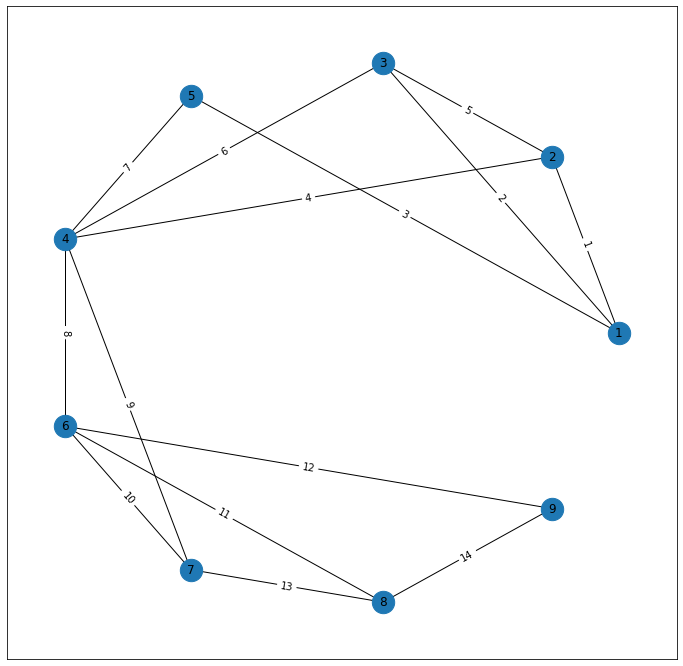

In [ ]:
# drawLayout(labledEdge)